In [15]:
import numpy as np
hogg=[[24,14,11, 7,19],
[15, 7, 9, 7,24],
[21,12, 7, 4,19],
[27,17,13, 7,15],
[33,14,12,12,10],
[23,16,18,18,20]]
hogg= np.array(hogg)

# Dane dotyczą ilości bakterii w pięciu grupach

H0: m1=m2=m3=m4=m5 

średnia ilość bakterii we wszystkich pięciu grupach jest taka sama

H1: mi=/=mj

średnia ilość bakterii dla conajmniej jednej pary z pięciu grup jest różna 


**ANALIZA WARIANCJI ANOVA (Analysis of Variance)**

to powszechnie stosowana metoda statystyczna  pozwalająca na ocenę istotności różnic wielu średnich z prób pochodzących z wielu populacji (grup)


Celem analizy wariancji (Anova) jest zbadanie czy dane pochodzące z kilku grup mają tą samą średnią. 

Wykonujac anovę zawsze należy wpisać założenia, H0 i H1 oraz przeprowadzić interpretację wyników.



Podstawowe założenia testów ANOVA.


1. Mierzalność analizowanych zmiennych.
ane są mierzalne, bo sa wyrazone jako wartosc liczbowa i zostaly uzyskane na drodze pomiarow.
Założenie spelnione.

2. Niezależność zmiennych losowych w rozważanych populacjach (grupach).
 I tu jest problem, bo w sumie na to odpowiedź można uzyskać tylko wiedząc jak zostały poprane próbki.
Zakładamy, że technik pobierał i badał próbki zgodnie z procedurami, że to są różne próbki, a nie te same poddane modyfikacji.
Założenie spelnione.

3. Równoliczność wszystkich analizowanych grup.
Kazda z 5 grup zawiera 6 probek.
Założenie spelnione.
Jezeli to założenie nie jest spełnione, od razu przechodzimy do testu Kruskala-Wallisa (zadanie 5), nawet gdy rozklad danych jest normalny.

4. Normalność rozkładu zmiennych w każdej populacji (grupie).

H0: wszystkie grupy podlegaja rozkłądowi normalnemu

H1: nie wszystkie grupy podlegająr ozkładowi normalnemu

In [16]:
#Proszę sprawdzić tylko testem. Gdyby się okazało, że któraś kolumna nie spełnia kryterium, proszę ją wykluczyć z dalszej analizy.
grupa1 = hogg[:,0]
grupa2 = hogg[:,1]
grupa3 = hogg[:,2]
grupa4 = hogg[:,3]
grupa5 = hogg[:,4]
from scipy.stats import shapiro, normaltest, chisquare, jarque_bera, kstest
# Na tak małej próbie nie działają wszystkie testy, więc trzeba skorzystać z test Shapiro-Wilka
data=grupa1 # przypisz zmienną
print('grupa 1')

stat, p =shapiro(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')


grupa 1
['Shapiro-Wilk Test: stat=0.985, p=0.973442']
normal



In [ ]:
data=grupa2 # przypisz zmienną
print('grupa 2')

stat, p =shapiro(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')


In [17]:
data=grupa3 # przypisz zmienną
print('grupa 3')

stat, p =shapiro(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')


grupa 3
['Shapiro-Wilk Test: stat=0.962, p=0.834850']
normal



In [18]:
data=grupa4 # przypisz zmienną
print('grupa 4')

stat, p =shapiro(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')


grupa 4
['Shapiro-Wilk Test: stat=0.854, p=0.168326']
normal



In [19]:
data=grupa5 # przypisz zmienną
print('grupa 5')

stat, p =shapiro(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('normal\n') 
else: print('not normal\n')

grupa 5
['Shapiro-Wilk Test: stat=0.943, p=0.682007']
normal



Czy założenie o normalności (wszystkich) danych jest spełnione?

Odp: Na poziomie istotności 0,05 nie mamy podstaw, by odrzucić hipotezę zerową, że wszystkie grupy podlegają rozkładowi normalnemu

5. Jednorodnośc wariancji
H0 i H1 są poniżej:

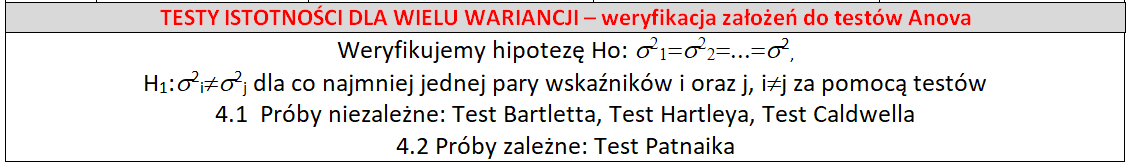

Hipotezę o jednorodności wariancji należy zweryfikować za pomocą testu bartlett (sample1, sample2,…), ktory zwraca zbiorczą statystykę i wartość p dla hipotezy zerowej, że serie danych  x pochodzą z rozkładów normalnych o tej samej wariancji. 

Alternatywną hipotezą jest to, że nie wszystkie kolumny danych mają tę samą wariancję. 

Inne testy można w ramach poszerzenia wiedzy sprawdzic samemu, ale należy uwazać, tj. uwaznie czytać dokumentację.


In [20]:
import scipy
from scipy.stats import bartlett
scipy.stats.bartlett(hogg.T[0,:], hogg.T[1,:], hogg.T[2,:], hogg.T[3,:], hogg.T[4,:])

BartlettResult(statistic=1.7010441054530643, pvalue=0.7905279522192562)

Czy założenie o jednorodności wariancji jest spełnione?

Odp: na poziomie istotności 0,05 nie mamy podstaw do odzrucenia hipotezy, że próby mają równą wariancję

Jeżeli załozenie nie jest spełnione (wariancje sa rózne), wykonujemy test Welcha (zadanie 4).

Gdy wszystkie założenia sa spełnione, można przeprowadzić analizę Anova.
Analiza wariancji z klasyfikacją pojedynczą.

Jeśli wpływ na badaną zmienną (objaśnianą) ma tylko jeden czynnik, mamy do czynienia z modelem jednoczynnikowym.


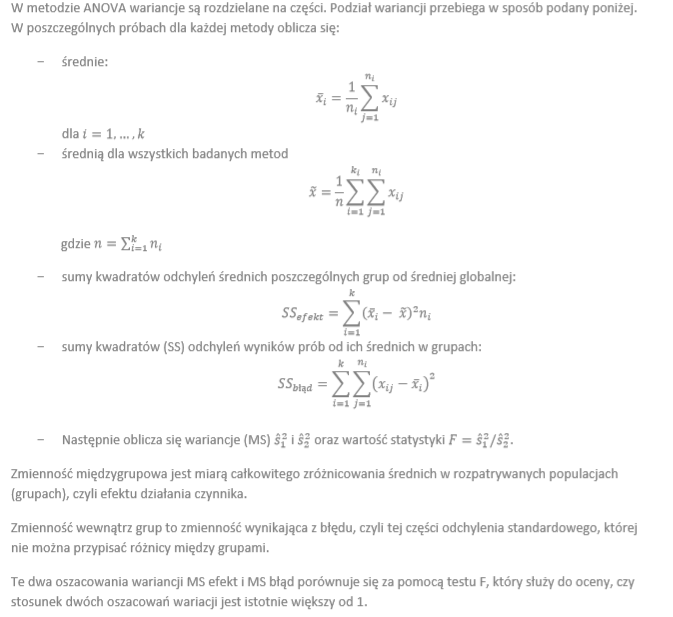

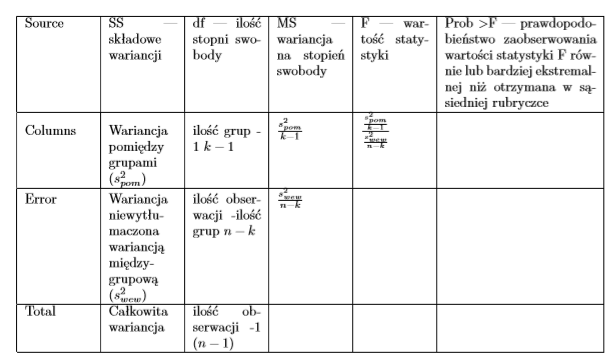

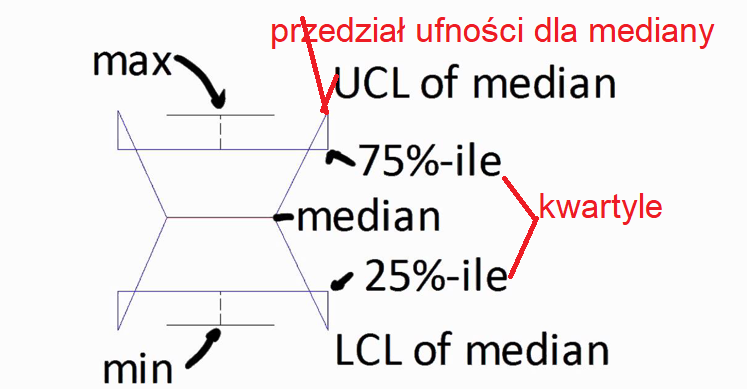

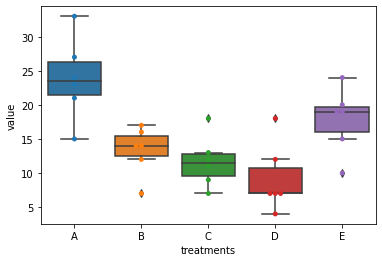

In [21]:
import pandas as pd
hogg=[[24,14,11, 7,19],
[15, 7, 9, 7,24],
[21,12, 7, 4,19],
[27,17,13, 7,15],
[33,14,12,12,10],
[23,16,18,18,20]]
# przekształcenie ramki danych na odpowiednią dla pakietu statsmodels 
df = pd.DataFrame(hogg)
df.columns =['A','B','C','D','E']
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D', 'E'])
df_melt.columns = ['index', 'treatments', 'value']
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt)
ax = sns.swarmplot(x="treatments", y="value", data=df_melt)
plt.show()

Proszę wywołać polecenie f_oneway dla analizowanych danych.

In [22]:
import scipy.stats as stats
# stats funkcje f_oneway pobierają grupy jako dane wejściowe i zwracają wartość ANOVA F i p
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'], df['E'])
print('Statystyka f: stat=%.3f, wartość: p=%3f' %(fvalue, pvalue)) 

#  tabela ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Statystyka f: stat=9.008, wartość: p=0.000120


,sum_sq,df,F,PR(>F)
C(treatments),803.000000,4.0,9.007628,0.00012
Residual,557.166667,25.0,NaN,NaN


Ile wynosi wartość p i co to oznacza (co robimy z H0 i jak to interpretujemy - średnie sa równe czy nie)?

Odp: na poziomie istotności 0,05 odrzucamy hipotezę zerową i przymujemy hipotezę alteernatywną.

TESTY POST - HOC (po fakcie)

Analiza wariancji mówi nam o tym czy różnice w porównywanych średnich występują czy nie. Nie wiemy jednak między którymi grupami zachodzą te ewentualne różnice.

scikit-posthocs to pakiet Pythona, który zapewnia testy post hoc dla wielokrotnych porównań parami, które są zwykle wykonywane w statystycznej analizie danych w celu oceny różnic między poziomami grup, jeśli uzyskano statystycznie istotny wynik testu ANOVA.

scikit-posthocs jest ściśle zintegrowany z macierzami Pandas DataFrames i NumPy, aby zapewnić szybkie obliczenia oraz wygodny import i przechowywanie danych.

Ten pakiet będzie przydatny dla statystyków, analityków danych i badaczy, którzy używają Pythona w swojej pracy. 
https://github.com/maximtrp/scikit-posthocs

In [23]:
import statsmodels.api as sa
import scikit_posthocs as sp

hogg=[[24,14,11, 7,19],
[15, 7, 9, 7,24],
[21,12, 7, 4,19],
[27,17,13, 7,15],
[33,14,12,12,10],
[23,16,18,18,20]]
x=hogg

df = pd.DataFrame(hogg)
df.columns =['A','B','C','D','E']
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D', 'E'])
df_melt.columns = ['index', 'treatments', 'value']

sp.posthoc_conover(x, p_adjust = 'holm')

x = df.melt(var_name='treatments', value_name='values')
sp.posthoc_conover(x, val_col='values', group_col='treatments')

,A,B,C,D,E
A,1.000000,0.001982,0.000271,0.000023,0.131032
B,0.001982,1.000000,0.442348,0.096532,0.070067
C,0.000271,0.442348,1.000000,0.353092,0.013045
D,0.000023,0.096532,0.353092,1.000000,0.001308
E,0.131032,0.070067,0.013045,0.001308,1.000000


In [24]:



import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#create DataFrame to hold data
df = pd.DataFrame({'score': [24, 15, 21, 27, 33, 23,
                             14, 7, 12,17,14,16,
                             11,9,7,13,12,18,
                             7,7,4,7,12,18,
                            19,24,19,15,10,20 ],
                   'group': np.repeat(['a', 'b', 'c','d','e'], repeats=6)}) 

tukey = pairwise_tukeyhsd(endog=df['score'],  groups=df['group'], alpha=0.05)
print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b    -10.5 0.0059 -18.5047 -2.4953   True
     a      c -12.1667 0.0013 -20.1714 -4.1619   True
     a      d -14.6667 0.0001 -22.6714 -6.6619   True
     a      e     -6.0 0.2119 -14.0047  2.0047  False
     b      c  -1.6667 0.9719  -9.6714  6.3381  False
     b      d  -4.1667 0.5544 -12.1714  3.8381  False
     b      e      4.5 0.4806  -3.5047 12.5047  False
     c      d     -2.5 0.8876 -10.5047  5.5047  False
     c      e   6.1667 0.1905  -1.8381 14.1714  False
     d      e   8.6667 0.0292   0.6619 16.6714   True
-----------------------------------------------------


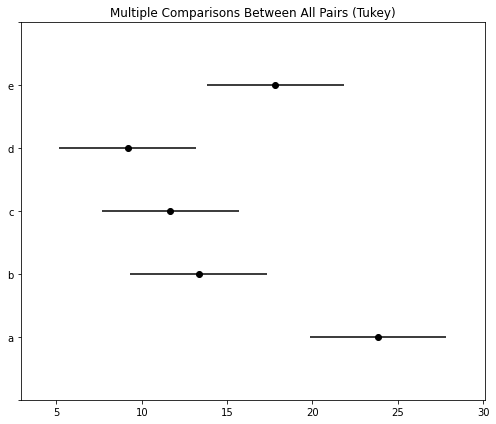

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
tukey.plot_simultaneous(ax=ax,figsize=(7, 6)) 
ax.vlines(x=0,ymin=-0.5,ymax=4.5, color="red")
fig.tight_layout()


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x1b9dc3e75e0>)

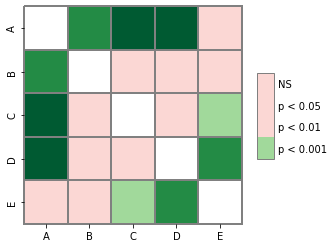

In [26]:
pc = sp.posthoc_conover(x, val_col='values', group_col='treatments')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

Która średnia istotnie różni sie od pozostałych? Czy jest to tylko jedna srednia czy jest ich wiecej?
grupy a i e odstają od reszty.
Proszę jeszcze raz przeprowadzić analize Anova dla tych trzech grup, które wykazują tą samą średnią.

Czy wyniki Anovy przeprowadzone dla tych 3 grup sa zgodne z przewidywaniami? Jak teraz wygląda wykres uzyskany funkcja scikit-posthocs?



In [27]:
import pandas as pd
hogg=[[24,14,11, 7,19],
[15, 7, 9, 7,24],
[21,12, 7, 4,19],
[27,17,13, 7,15],
[33,14,12,12,10],
[23,16,18,18,20]]
# przekształcenie ramki danych na odpowiednią dla pakietu statsmodels 
df = pd.DataFrame(hogg)
df.columns =['A','B','C','D','E']
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D', 'E'])
df_melt.columns = ['index', 'treatments', 'value']

# rozwiązanie
import scipy.stats as stats
# stats funkcje f_oneway pobierają grupy jako dane wejściowe i zwracają wartość ANOVA F i p
fvalue, pvalue = stats.f_oneway(df['B'], df['C'], df['D'])
print('Statystyka f: stat=%.3f, wartość: p=%3f' %(fvalue, pvalue)) 

#  tabela ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


Statystyka f: stat=1.514, wartość: p=0.251875


,sum_sq,df,F,PR(>F)
C(treatments),803.000000,4.0,9.007628,0.00012
Residual,557.166667,25.0,NaN,NaN


po odrzuceniu odstających grup i przeprowadzeniu ponownie testu ANOVAmozęmy stwierdzić, że na poziomie istotnosci 0,05 nie mamy powodu do dorzucenia hipotezy, że grupy b,c,d mają tą samą średnią.